In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
%matplotlib inline
import seaborn as sns; sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
labels = pd.read_csv("SeattleData/access_attributes.csv")

In [3]:
labels

,Attribute ID,Label Type,Street ID,OSM Street ID,Neighborhood Name,Attribute Latitude,Attribute Longitude,Severity,Temporary,Agree Count,Disagree Count,Not Sure Count
0,57259626,CurbRamp,22481,394459713,Portage Bay,47.643120,-122.320300,3.0,False,0,0,1
1,57259627,CurbRamp,12051,13521798,Portage Bay,47.643257,-122.321890,1.0,False,2,0,0
2,57259629,CurbRamp,12051,13521798,Portage Bay,47.643116,-122.322100,1.0,False,2,1,0
3,57259630,CurbRamp,22481,394459713,Portage Bay,47.643154,-122.320170,1.0,False,1,0,0
4,57259632,CurbRamp,6732,6456858,Portage Bay,47.651380,-122.321200,1.0,False,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
93757,59103771,Crosswalk,3338,6394365,Greenwood,47.686950,-122.360530,5.0,False,4,0,0
93758,59103773,Crosswalk,25421,465991369,Greenwood,47.690610,-122.356500,1.0,False,4,0,0
93759,59103776,Crosswalk,25422,465991369,Greenwood,47.690613,-122.356804,1.0,False,4,0,0
93760,59103777,Crosswalk,5047,6428527,Greenwood,47.686222,-122.357050,1.0,False,4,0,0


In [4]:
labels.sort_values(by=['Disagree Count'])

,Attribute ID,Label Type,Street ID,OSM Street ID,Neighborhood Name,Attribute Latitude,Attribute Longitude,Severity,Temporary,Agree Count,Disagree Count,Not Sure Count
0,57259626,CurbRamp,22481,394459713,Portage Bay,47.643120,-122.320300,3.0,False,0,0,1
58796,58869856,NoCurbRamp,16764,158782246,Ravenna,47.679340,-122.302765,4.0,False,0,0,1
58794,58869848,NoCurbRamp,1641,6362041,Ravenna,47.670380,-122.293960,3.0,False,2,0,0
58793,58869847,NoCurbRamp,10263,6514483,Ravenna,47.670414,-122.293730,3.0,False,3,0,0
58792,58869844,NoCurbRamp,1919,6368405,Ravenna,47.672110,-122.299490,3.0,False,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21955,59092414,Crosswalk,815,6347753,Columbia City,47.558086,-122.276700,NaN,False,2,12,0
26849,57878493,Obstacle,26881,620596652,International District,47.596580,-122.326294,3.0,False,7,13,1
83572,58880079,SurfaceProblem,23785,428097040,Industrial District,47.587530,-122.396210,1.0,False,9,14,1
65215,59045346,SurfaceProblem,25030,460418989,Mount Baker,47.583570,-122.295030,2.0,False,8,15,5


### Labels by Type

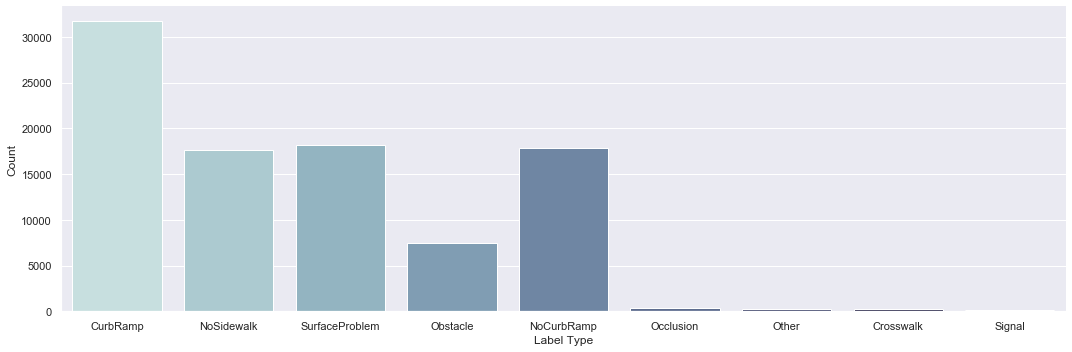

In [5]:
g=sns.catplot(x="Label Type", kind="count", palette="ch:start=.2,rot=-.3", data=labels,  height=5, aspect=3)
g.set_axis_labels("Label Type", "Count")

In [6]:
g.savefig('ByLabelType.png')

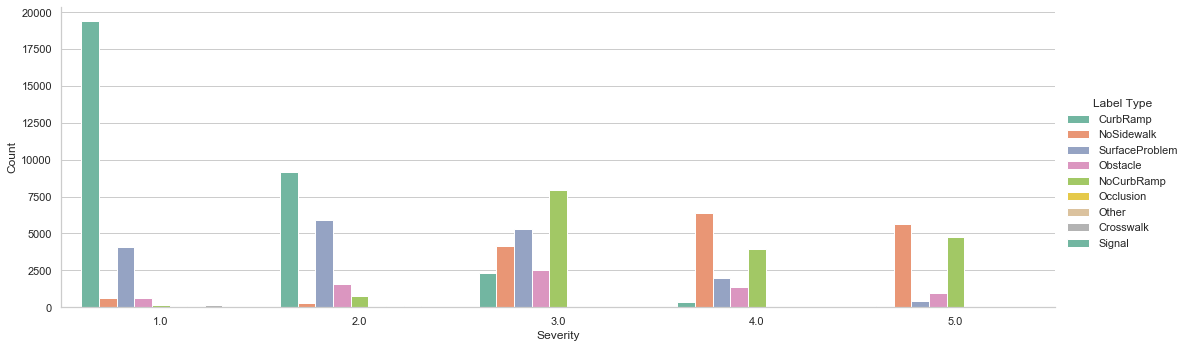

In [12]:
sns.set_theme(style="whitegrid")
g=sns.catplot(x="Severity", kind="count", hue ="Label Type", palette="Set2", data=labels,  height=5, aspect=3)
g.set_axis_labels("Severity", "Count")

### Labels by Type & Severity

In [104]:
SeverityPlot = labels.loc[(labels['Label Type'] == 'CurbRamp')| (labels['Label Type'] == 'NoSidewalk') | (labels['Label Type'] == 'NoSidewalk') | (labels['Label Type'] == 'SurfaceProblem') | (labels['Label Type'] == 'Obstacle') | (labels['Label Type'] == 'NoCurbRamp') ]

In [105]:
SeverityPlot

,Attribute ID,Label Type,Street ID,OSM Street ID,Neighborhood Name,Attribute Latitude,Attribute Longitude,Severity,Temporary,Agree Count,Disagree Count,Not Sure Count
0,57259626,CurbRamp,22481,394459713,Portage Bay,47.643120,-122.320300,3.0,False,0,0,1
1,57259627,CurbRamp,12051,13521798,Portage Bay,47.643257,-122.321890,1.0,False,2,0,0
2,57259629,CurbRamp,12051,13521798,Portage Bay,47.643116,-122.322100,1.0,False,2,1,0
3,57259630,CurbRamp,22481,394459713,Portage Bay,47.643154,-122.320170,1.0,False,1,0,0
4,57259632,CurbRamp,6732,6456858,Portage Bay,47.651380,-122.321200,1.0,False,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
93751,59103736,NoCurbRamp,23502,428083353,Greenwood,47.690670,-122.344760,3.0,False,1,1,0
93752,59103755,NoCurbRamp,5046,6428527,Greenwood,47.686170,-122.349990,3.0,False,1,0,0
93753,59103756,NoCurbRamp,16097,158718276,Greenwood,47.684853,-122.349846,5.0,False,1,0,0
93754,59103763,NoCurbRamp,20133,289314036,Greenwood,47.686910,-122.347115,3.0,False,2,0,0


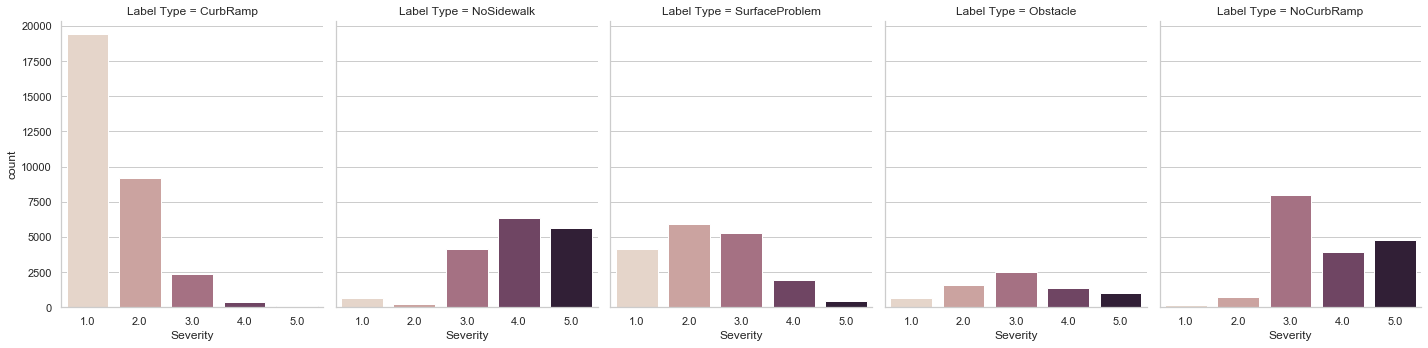

In [123]:
g1 = sns.catplot(x="Severity", col="Label Type",palette="ch:.15",
                data= SeverityPlot, kind="count",
                height=5, aspect=0.8)

In [124]:
g1.savefig('BySeverity.png')

In [6]:
CurbRamp = labels.loc[labels['Label Type'] == 'CurbRamp']
Crosswalk = labels.loc[labels['Label Type'] == 'Crosswalk']
NoCurbRamp = labels.loc[labels['Label Type'] == 'NoCurbRamp']
NoSidewalk = labels.loc[labels['Label Type'] == 'NoSidewalk']
Obstacle = labels.loc[labels['Label Type'] == 'Obstacle']
Occlusion = labels.loc[labels['Label Type'] == 'Occlusion']
Other = labels.loc[labels['Label Type'] == 'Other']
Signal = labels.loc[labels['Label Type'] == 'Signal']
SurfaceProblem = labels.loc[labels['Label Type'] == 'SurfaceProblem']

In [7]:
CurbRamp

,Attribute ID,Label Type,Street ID,OSM Street ID,Neighborhood Name,Attribute Latitude,Attribute Longitude,Severity,Temporary,Agree Count,Disagree Count,Not Sure Count
0,57259626,CurbRamp,22481,394459713,Portage Bay,47.643120,-122.320300,3.0,False,0,0,1
1,57259627,CurbRamp,12051,13521798,Portage Bay,47.643257,-122.321890,1.0,False,2,0,0
2,57259629,CurbRamp,12051,13521798,Portage Bay,47.643116,-122.322100,1.0,False,2,1,0
3,57259630,CurbRamp,22481,394459713,Portage Bay,47.643154,-122.320170,1.0,False,1,0,0
4,57259632,CurbRamp,6732,6456858,Portage Bay,47.651380,-122.321200,1.0,False,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
93437,59101944,CurbRamp,25984,519402253,Greenwood,47.690693,-122.352516,1.0,False,1,0,0
93438,59101945,CurbRamp,15581,158232267,Greenwood,47.689930,-122.349970,1.0,False,1,0,0
93439,59101948,CurbRamp,2263,6373869,Greenwood,47.688435,-122.355156,1.0,False,0,0,0
93440,59101949,CurbRamp,13768,39332449,Greenwood,47.694115,-122.349440,1.0,False,1,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f814afc1050>]],
      dtype=object)

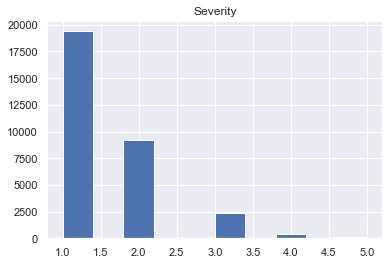

In [8]:
CurbRamp.hist(column='Severity')

In [7]:
sns.set_theme(style="whitegrid")
sns.catplot(x="Severity", kind="count", palette="ch:.15", data=CurbRamp)

NameError: name 'CurbRamp' is not defined

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f814b75e290>]],
      dtype=object)

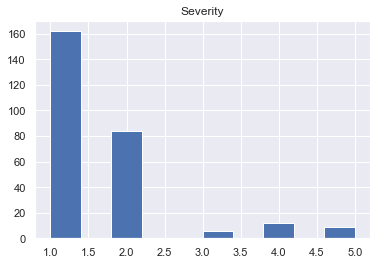

In [9]:
Crosswalk.hist(column='Severity')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f814b873dd0>]],
      dtype=object)

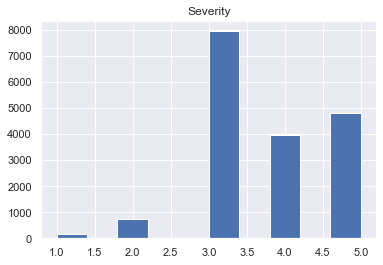

In [10]:
NoCurbRamp.hist(column='Severity')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f814b955390>]],
      dtype=object)

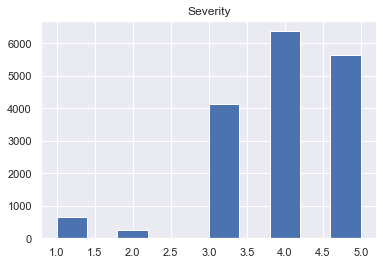

In [11]:
NoSidewalk.hist(column='Severity')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f814ba3ac90>]],
      dtype=object)

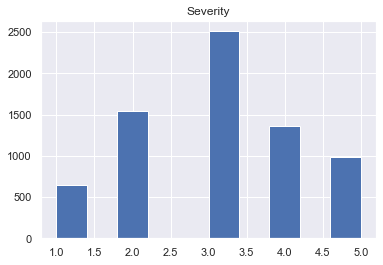

In [12]:
Obstacle.hist(column='Severity')

In [13]:
CurbRamp_1 = CurbRamp.loc[labels['Severity'] == 1]

In [31]:
CurbRamp_1

,Attribute ID,Label Type,Street ID,OSM Street ID,Neighborhood Name,Attribute Latitude,Attribute Longitude,Severity,Temporary,Agree Count,Disagree Count,Not Sure Count
1,57259627,CurbRamp,12051,13521798,Portage Bay,47.643257,-122.321890,1.0,False,2,0,0
2,57259629,CurbRamp,12051,13521798,Portage Bay,47.643116,-122.322100,1.0,False,2,1,0
3,57259630,CurbRamp,22481,394459713,Portage Bay,47.643154,-122.320170,1.0,False,1,0,0
4,57259632,CurbRamp,6732,6456858,Portage Bay,47.651380,-122.321200,1.0,False,2,0,0
6,57259634,CurbRamp,22366,392696872,Portage Bay,47.650010,-122.322180,1.0,False,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
93437,59101944,CurbRamp,25984,519402253,Greenwood,47.690693,-122.352516,1.0,False,1,0,0
93438,59101945,CurbRamp,15581,158232267,Greenwood,47.689930,-122.349970,1.0,False,1,0,0
93439,59101948,CurbRamp,2263,6373869,Greenwood,47.688435,-122.355156,1.0,False,0,0,0
93440,59101949,CurbRamp,13768,39332449,Greenwood,47.694115,-122.349440,1.0,False,1,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd7f9125d0>]],
      dtype=object)

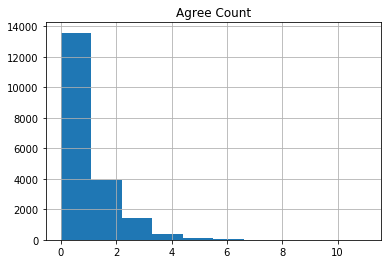

In [34]:
CurbRamp_1.hist(column='Agree Count')

In [35]:
CurbRamp_1_a = CurbRamp_1.loc[labels['Disagree Count'] == 0]

In [36]:
CurbRamp_1_a

,Attribute ID,Label Type,Street ID,OSM Street ID,Neighborhood Name,Attribute Latitude,Attribute Longitude,Severity,Temporary,Agree Count,Disagree Count,Not Sure Count
1,57259627,CurbRamp,12051,13521798,Portage Bay,47.643257,-122.321890,1.0,False,2,0,0
3,57259630,CurbRamp,22481,394459713,Portage Bay,47.643154,-122.320170,1.0,False,1,0,0
4,57259632,CurbRamp,6732,6456858,Portage Bay,47.651380,-122.321200,1.0,False,2,0,0
6,57259634,CurbRamp,22366,392696872,Portage Bay,47.650010,-122.322180,1.0,False,0,0,0
7,57259635,CurbRamp,6732,6456858,Portage Bay,47.651524,-122.321144,1.0,False,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
93437,59101944,CurbRamp,25984,519402253,Greenwood,47.690693,-122.352516,1.0,False,1,0,0
93438,59101945,CurbRamp,15581,158232267,Greenwood,47.689930,-122.349970,1.0,False,1,0,0
93439,59101948,CurbRamp,2263,6373869,Greenwood,47.688435,-122.355156,1.0,False,0,0,0
93440,59101949,CurbRamp,13768,39332449,Greenwood,47.694115,-122.349440,1.0,False,1,0,0
